In [1]:
# libraries
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_distance(flows_w: np.ndarray, laplacian: np.ndarray) -> float:
    '''Calculate the mean distance between flow vectors and their neighbors.'''
    distances = []
    for i in range(flows_w.shape[0]):
        alpha = flows_w[i].T
        distances.append(np.trace(alpha.T @ laplacian @ alpha))
    return np.mean(distances)

In [3]:
def mean_sparsity(flows_w: np.ndarray) -> float:
    '''Calculate the mean sparsity of flow vectors.'''
    sparsities = []
    for i in range(flows_w.shape[0]):
        alpha = flows_w[i].T
        sparsities.append(1 - np.count_nonzero(alpha) / alpha.size)
    return np.mean(sparsities)

In [4]:
laplacian = np.load('results_eco_46nodes/laplacian.npy')
laplacian.shape, laplacian.size

((46, 46), 2116)

In [5]:
list_experiments = [8, 17, 26, 35, 44, 53, 62, 71]

In [6]:
for experiment in list_experiments:
    flows_w = np.load(f'results_eco_46nodes/results_ecobici_experiment_{experiment}/weights.npy')
    flows_w_flat = np.load(f'results_eco_46nodes/results_ecobici_experiment_{experiment}_flat/weights.npy')

    mean_dist = mean_distance(flows_w, laplacian)
    mean_dist_flat = mean_distance(flows_w_flat, laplacian)
    mean_spars = mean_sparsity(flows_w)
    mean_spars_flat = mean_sparsity(flows_w_flat)
    print(f'Experiment {experiment}:')
    print(f'Dimensions: {flows_w.shape}')
    print(f'  Mean distance (flat): {mean_dist_flat:.4f}')
    print(f'  Mean distance: {mean_dist:.4f}')
    print(f'  Mean sparsity (flat): {mean_spars_flat:.4f}')
    print(f'  Mean sparsity: {mean_spars:.4f}\n\n')

Experiment 8:
Dimensions: (2068, 12, 46)
  Mean distance (flat): 0.0022
  Mean distance: 0.0022
  Mean sparsity (flat): 0.6215
  Mean sparsity: 0.6204


Experiment 17:
Dimensions: (2068, 20, 46)
  Mean distance (flat): 0.0011
  Mean distance: 0.0022
  Mean sparsity (flat): 0.7520
  Mean sparsity: 0.7368


Experiment 26:
Dimensions: (2068, 24, 46)
  Mean distance (flat): 0.0009
  Mean distance: 0.0019
  Mean sparsity (flat): 0.7609
  Mean sparsity: 0.7505


Experiment 35:
Dimensions: (2068, 28, 46)
  Mean distance (flat): 0.0009
  Mean distance: 0.0018
  Mean sparsity (flat): 0.7905
  Mean sparsity: 0.7835


Experiment 44:
Dimensions: (2068, 30, 46)
  Mean distance (flat): 0.0010
  Mean distance: 0.0020
  Mean sparsity (flat): 0.7799
  Mean sparsity: 0.7719


Experiment 53:
Dimensions: (2068, 34, 46)
  Mean distance (flat): 0.0009
  Mean distance: 0.0018
  Mean sparsity (flat): 0.8059
  Mean sparsity: 0.7947


Experiment 62:
Dimensions: (2068, 36, 46)
  Mean distance (flat): 0.0011
  Me

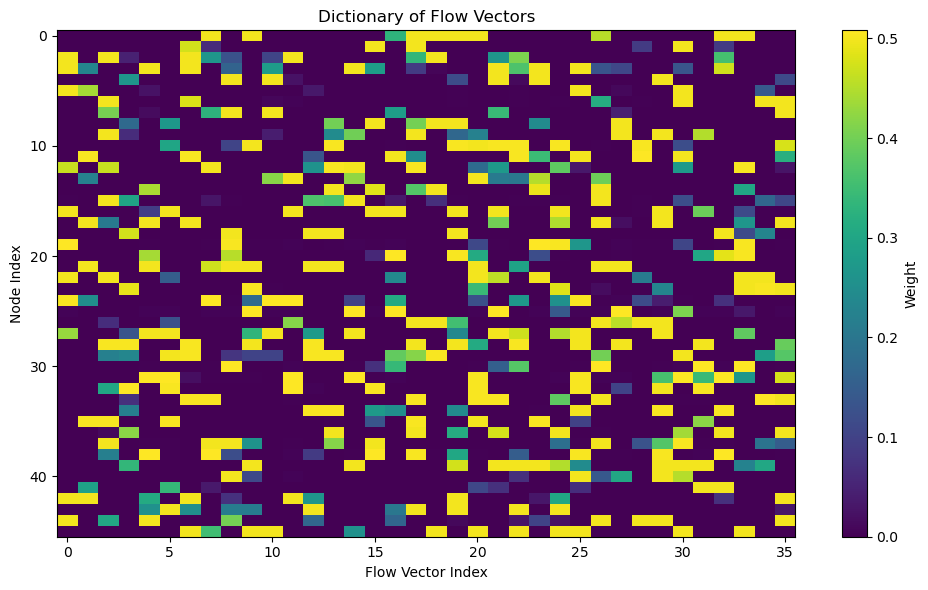

In [7]:
dictionary = np.load('results_eco_46nodes/results_ecobici_experiment_62_flat/dictionary.npy')

plt.figure(figsize=(10, 6))
plt.imshow(dictionary, aspect='auto', cmap='viridis')
plt.colorbar(label='Weight')
plt.title('Dictionary of Flow Vectors')
plt.xlabel('Flow Vector Index')
plt.ylabel('Node Index')
plt.tight_layout()
plt.show()

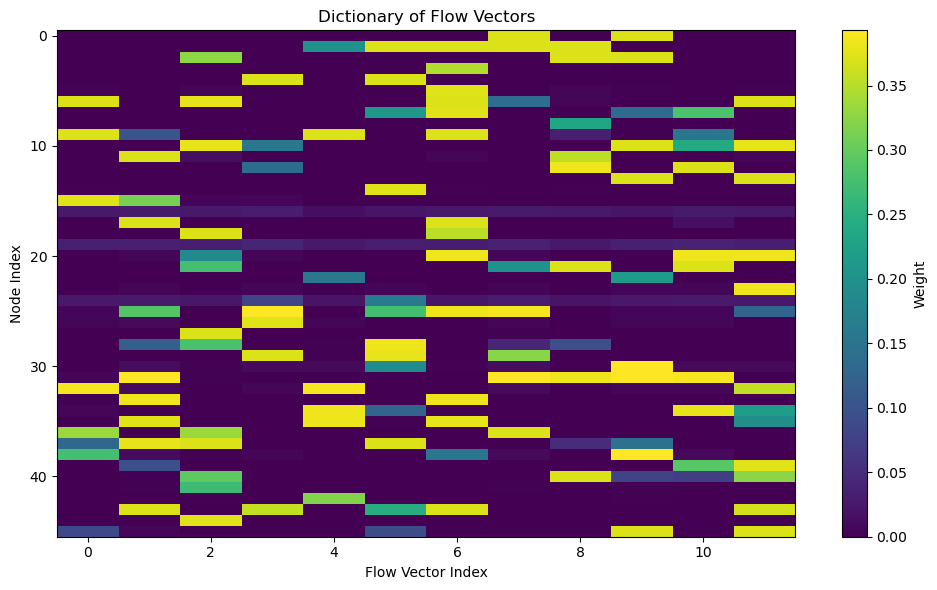

In [9]:
dictionary2 = np.load('results_eco_46nodes/results_ecobici_experiment_8_flat/dictionary.npy')
plt.figure(figsize=(10, 6))
plt.imshow(dictionary2, aspect='auto', cmap='viridis')
plt.colorbar(label='Weight')
plt.title('Dictionary of Flow Vectors')
plt.xlabel('Flow Vector Index')
plt.ylabel('Node Index')
plt.tight_layout()
plt.show()